In [1]:
import sys
import pandas as pd
import matplotlib
import seaborn
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:

train.shape

(450, 13)

In [4]:
print(train.columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [5]:
from sklearn.utils import shuffle
train = shuffle(train)

In [6]:
train[train['rain']!=0].count()

X        8
Y        8
month    8
day      8
FFMC     8
DMC      8
DC       8
ISI      8
temp     8
RH       8
wind     8
rain     8
area     8
dtype: int64

In [7]:
train.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,4.637778,4.306667,90.711556,112.545333,548.043556,9.131111,19.018889,44.580000,4.053778,0.024889,10.145489
std,2.337816,1.233966,5.494715,66.095553,249.387800,4.646632,5.860120,16.254081,1.750621,0.317146,43.300743
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.875000,438.500000,6.500000,15.700000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.150000,658.200000,8.400000,19.400000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,715.100000,10.950000,22.875000,54.000000,4.900000,0.000000,6.345000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,746.280000


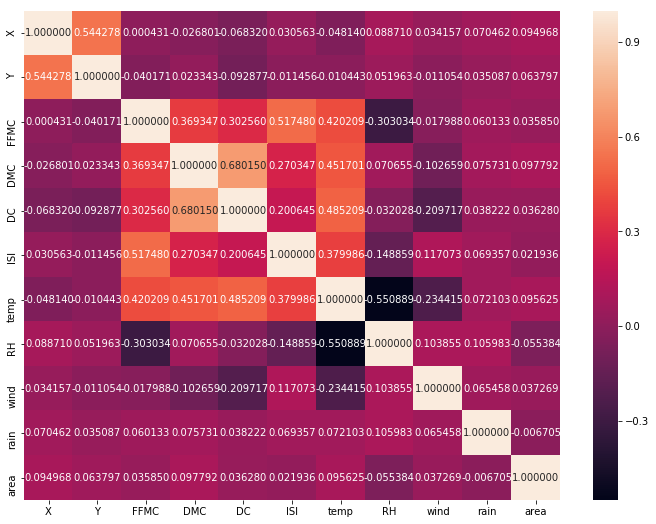

In [8]:
corrmat=train.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat, annot=True, fmt="f")
#sns.heatmap(corrmat,vmax=.9,square=True)
plt.show()

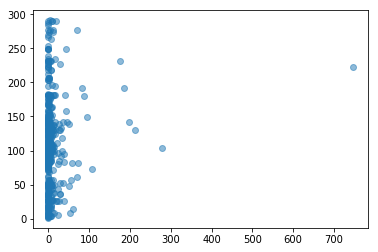

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)



x = train['area']
y = train['DMC']

area = (30 * np.random.rand(10))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=.5)
plt.show()

In [9]:
train=train[train['area']<25]

In [10]:
col=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind']
target='area'

In [11]:
train=train[train['FFMC']>75]

In [12]:
from sklearn.model_selection import train_test_split
#training set
train_set=train.sample(frac=0.8,random_state=1)
#test set
test_set=train.loc[~train.index.isin(train_set.index)]
print(train_set.shape)
print(test_set.shape)

(323, 13)
(81, 13)


In [34]:
from sklearn.ensemble import RandomForestRegressor



model = RandomForestRegressor(n_estimators=13,random_state=4)
model.fit(train_set[col],train_set[target])
predictions = model.predict(test_set[col])

In [14]:
##from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error

##model = LinearRegression()
#model.fit(train_set[col],train_set[target])
#predictions = model.predict(test_set[col])

In [38]:
model.fit(train[col],train[target]) 
predictions=model.predict(test[col])

In [39]:


new_list = []
for item in predictions:
    new_list.append(item)

In [40]:
print(new_list)

[7.971538461538462, 0.20115384615384618, 4.803846153846154, 0.6900000000000001, 0.7246153846153847, 0.9815384615384615, 0.8123076923076924, 9.163846153846153, 0.2446153846153846, 2.9128205128205127, 0.7207692307692308, 0.7100000000000001, 1.9599999999999997, 2.7615384615384615, 1.2607692307692309, 4.479230769230769, 2.5669230769230773, 3.0584615384615383, 0.8030769230769231, 2.32, 1.6015384615384616, 18.256102564102566, 0.7538461538461539, 0.8538461538461538, 6.607307692307693, 2.17, 2.2592307692307694, 1.0438461538461539, 2.8415384615384616, 6.120769230769231, 2.3661538461538463, 0.0, 0.8392307692307692, 4.607692307692307, 2.2800000000000002, 5.101538461538461, 0.6092307692307692, 2.3661538461538463, 1.1753846153846153, 2.36, 0.7238461538461538, 0.9692307692307691, 1.4646153846153847, 0.9835897435897436, 1.5915384615384613, 18.256102564102566, 2.866923076923077, 2.8, 3.8557692307692317, 1.5184615384615385, 3.708461538461538, 0.9115384615384616, 4.281538461538461, 4.281538461538461, 2.

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(new_list,test_set[target])

24.32506394305241

In [41]:
my_submission = pd.DataFrame({'Id': test.Id, 'area': new_list})

my_submission.to_csv('submission11.csv', index=False)